In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Load the dataset
df=pd.read_csv(r"/kaggle/input/netflix-prize-data/combined_data_1.txt", header=None, names=['Cust_Id','Rating'],usecols=[0,1])
df.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [3]:
#Check the overall information of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [4]:
#Check the shape of the data.
df.shape

(24058263, 2)

In [5]:
#Count the number of ratings given by customers.
ratings_count=pd.DataFrame(df['Rating'].value_counts().sort_index(ascending=True))
ratings_count

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [6]:
#Calculate how many movies we are having on our dataset.
movie_count=df.isnull().sum()[1]
movie_count

4499

In [7]:
# Get the customer count without NaN values (as it will contain unique values of movie id also)
customer_count=df['Cust_Id'].nunique() - movie_count
customer_count

470758

In [8]:
# Aggregate count of rating
Total_ratings_count=ratings_count.sum()[0]
Total_ratings_count

24053764

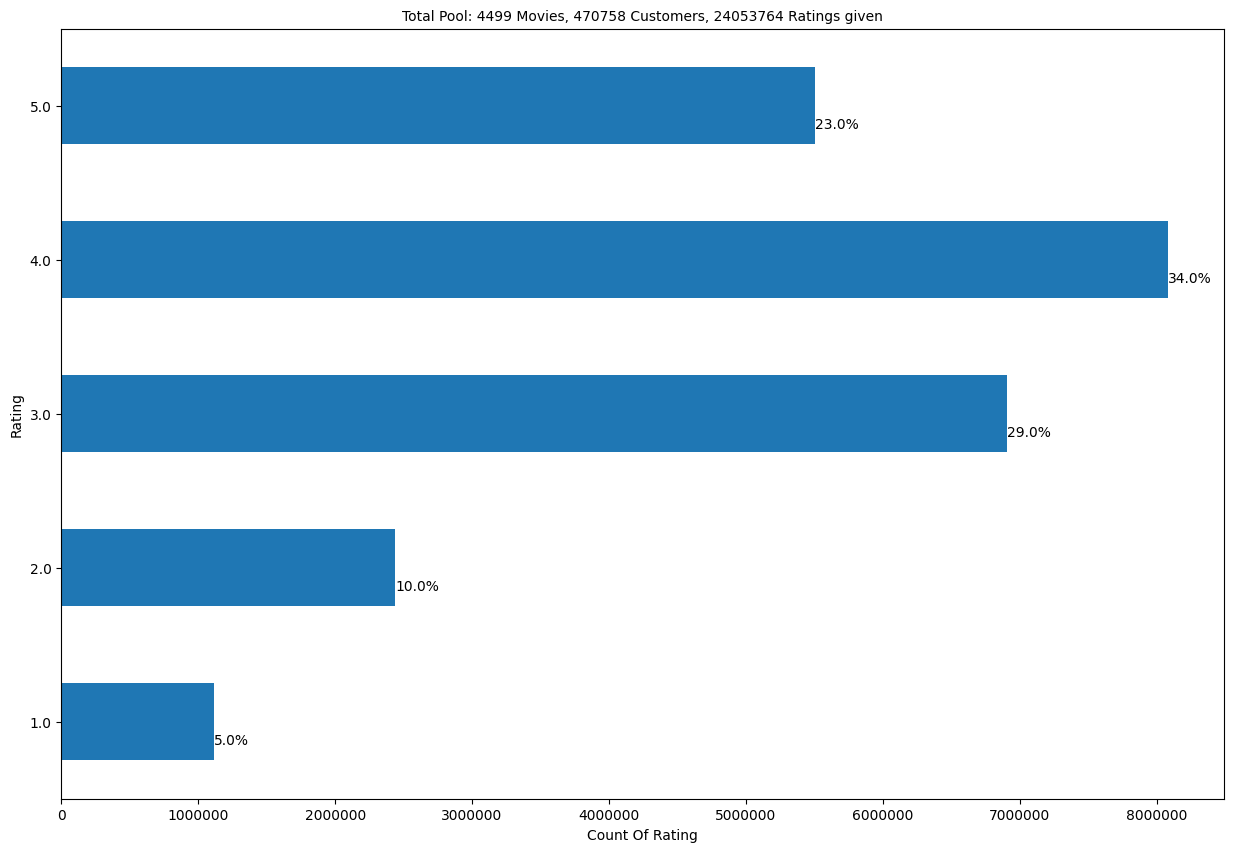

In [9]:
#Visualize the Ratings with the help of bar plot.

ax=ratings_count.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f"Total Pool: {movie_count} Movies, {customer_count} Customers, {Total_ratings_count} Ratings given", fontsize=10)
plt.xlabel("Count Of Rating")
plt.ylabel("Rating")

for i in ax.patches:
  percentage=i.get_width() / Total_ratings_count * 100
  ax.text(i.get_width(), i.get_y() + 0.1, \
          f"{round(percentage,0)}%", fontsize=10, color='black')

plt.ticklabel_format(style='plain',axis='x')
plt.show()

In [10]:
df['Rating'].isnull()

0            True
1           False
2           False
3           False
4           False
            ...  
24058258    False
24058259    False
24058260    False
24058261    False
24058262    False
Name: Rating, Length: 24058263, dtype: bool

In [11]:
# Add another that will have movie id.
# Get all the index where null value is present beacuse it is representing the movie id.

df_nan=pd.DataFrame(df['Rating'].isnull())
df_nan=df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [12]:
#Check the shape
df_nan.shape

(4499, 1)

In [13]:
# Now we will reset the index and make it a column
df_nan.reset_index(inplace=True)
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [14]:
# #This will load all the rows except the last row.
# df_nan['index'][:-1]

In [15]:
# #This will load all the rows except the first row.
# df_nan['index'][1:]

In [16]:
# #This will zip all the rows except first row and all the rows except last row in the form of a tuple.
# a=zip(df_nan['index'][1:],df_nan['index'][:-1])

In [17]:
# tuple(a)

In [18]:
# Now we will numpy array that will contain 1 for values between 0-547, 2 for values betwn 548-693  and so on.
# Creating an empty list.
movie_np=[]

# Initializing the value of movie id which will increase with each iteration.
movie_id=1

# Creating a loop to iterate over consecutive pairs of indices.
for i, j  in zip(df_nan['index'][1:], df_nan['index'][:-1]):

  # Creating a numpy array filled with the current movie ID
  temp=np.full((1,i-j-1), movie_id)   # Subtracting 1 from j means for e.g. i= 0 and j=548, in the index of 548 there
                                      # is a new movie id present so we will exclude that and fill upto 547 likewise
                                      # it will do for the rest.


  # Appending the numpy array to the movie_np list
  movie_np = np.append(movie_np,temp)

  # Incrementing the movie ID for the next iteration
  movie_id += 1

# Handling the last record separately

last_record = np.full((1, len(df) - df_nan.iloc[-1,0]-1), movie_id)

# Appending the last record to the movie_np list
movie_np = np.append(movie_np, last_record)

# Printing the movie numpy array and its length
print(f"Movie Numpy: {movie_np}")
print(f"Length: {len(movie_np)}")


Movie Numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [19]:
#Here we are removing all the places where null values (movies id) are present and keeping them in a separate column named as 'Movie_Id'

# Get all the data except the null values.
df=df[pd.notnull(df['Rating'])]

# Create a new column named 'Movie_Id'
df['Movie_Id']=movie_np.astype(int)

# Change the data type of 'Cust_Id' column to integer.
df['Cust_Id']=df['Cust_Id'].astype(int)

print('Now the dataset looks like: ')
df.iloc[:548]

Now the dataset looks like: 


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
544,1403184,3.0,1
545,1535440,4.0,1
546,1426604,4.0,1
547,1815755,5.0,1


In [20]:
# Its time to load our second dataset which contains the Movie Title and Genre.

df_title = pd.read_csv(r"/kaggle/input/movies-genres/movies.csv",header=0,names=['Movie_Id','Title','Genres'],on_bad_lines='skip')


df_title.head()

,Movie_Id,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_Id  27278 non-null  int64 
 1   Title     27278 non-null  object
 2   Genres    27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [22]:
# Now we are going to split the genres by converting them into string and then replacing '|' with ','.
df_title['Genres']=df_title['Genres'].str.split('|')
df_title

,Movie_Id,Title,Genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),[Comedy]
27274,131256,"Feuer, Eis & Dosenbier (2002)",[Comedy]
27275,131258,The Pirates (2014),[Adventure]
27276,131260,Rentun Ruusu (2001),[(no genres listed)]


In [23]:
# This function will transform each element of a list like column into a separate row,
# replicating the index values for each new row created  from the lists.
# for e.g. toy story movie was having 5 genres and was rated 547 times so after explode it will become 547*5 i.e. 2735 rows.

expanded_data=df_title.explode('Genres')
expanded_data

,Movie_Id,Title,Genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)
27277,131262,Innocence (2014),Adventure
27277,131262,Innocence (2014),Fantasy


In [24]:
# Checking the unique genres.

expanded_data['Genres'].unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [25]:
# As we can see in genres column there is 'IMAX' and 'no genres listed' are present as genres which are not relevant.
# So we will filter them out.

expanded_data=expanded_data[(expanded_data['Genres']!='IMAX') & (expanded_data['Genres']!='(no genres listed)')]

In [26]:
# Verifying if the irrelevant genres are gone or not.

expanded_data['Genres'].unique()

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Western',
       'Film-Noir'], dtype=object)

In [27]:
# Merge both the df and expanded_data  beased on Movie ID.

merged_df=pd.merge(df,expanded_data,on='Movie_Id',how='inner')
merged_df.head()

,Cust_Id,Rating,Movie_Id,Title,Genres
0,1488844,3.0,1,Toy Story (1995),Adventure
1,1488844,3.0,1,Toy Story (1995),Animation
2,1488844,3.0,1,Toy Story (1995),Children
3,1488844,3.0,1,Toy Story (1995),Comedy
4,1488844,3.0,1,Toy Story (1995),Fantasy


46714936, 5)

In [28]:
merged_df.shape

(46689942, 5)

547 rows × 5 columns

In [29]:
merged_df[merged_df['Title']=='Toy Story (1995)']

,Cust_Id,Rating,Movie_Id,Title,Genres
0,1488844,3.0,1,Toy Story (1995),Adventure
1,1488844,3.0,1,Toy Story (1995),Animation
2,1488844,3.0,1,Toy Story (1995),Children
3,1488844,3.0,1,Toy Story (1995),Comedy
4,1488844,3.0,1,Toy Story (1995),Fantasy
...,...,...,...,...,...
2730,1815755,5.0,1,Toy Story (1995),Adventure
2731,1815755,5.0,1,Toy Story (1995),Animation
2732,1815755,5.0,1,Toy Story (1995),Children
2733,1815755,5.0,1,Toy Story (1995),Comedy


In [30]:
merged_df[merged_df.isnull().any(axis=1)]

,Cust_Id,Rating,Movie_Id,Title,Genres


# 1. Find out the list of most popular and liked genre.

In [31]:
from IPython.core.display import display, HTML

# Calculate the average rating for each genre (most liked)
liked_genres = merged_df.groupby('Genres')['Rating'].mean().sort_values(ascending=False).reset_index()
most_liked_genres=liked_genres.head()

# Create HTML for the most liked genres
html_most_liked_genres = """
<h2>Most Liked Genres (by Average Rating)</h2>
<table border="1">
<tr>
    <th>Genre</th>
    <th>Average Rating</th>
</tr>
"""

for index, row in most_liked_genres.iterrows():
    html_most_liked_genres += f"<tr><td>{row['Genres']}</td><td>{row['Rating']:.2f}</td></tr>"

html_most_liked_genres += "</table>"

# Calculate the count of ratings for each genre (most popular)
most_popular_genres = merged_df.groupby('Genres')['Rating'].count().sort_values(ascending=False).reset_index()
most_popular_genres = most_popular_genres.rename(columns={'Rating': 'Rating_Count'}).head()

# Create HTML for the most popular genres
html_most_popular_genres = """
<h2>Most Popular Genres (by Rating Count)</h2>
<table border="1">
<tr>
    <th>Genre</th>
    <th>Rating Count</th>
</tr>
"""

for index, row in most_popular_genres.iterrows():
    html_most_popular_genres += f"<tr><td>{row['Genres']}</td><td>{row['Rating_Count']}</td></tr>"

html_most_popular_genres += "</table>"

# Display the HTML
display(HTML(html_most_liked_genres))
display(HTML(html_most_popular_genres))


Genre,Average Rating
Musical,3.73
Horror,3.73
Animation,3.71
Adventure,3.68
Children,3.66


Genre,Rating Count
Drama,11450961
Comedy,8452413
Romance,3862361
Thriller,3328392
Crime,2933642


# 3. Find what Genre Movies have received the best and worst ratings based on User Rating

In [32]:
Best_genre_movie=liked_genres
Best_genre_movie.head()

,Genres,Rating
0,Musical,3.734475
1,Horror,3.733749
2,Animation,3.709967
3,Adventure,3.681438
4,Children,3.661377


In [33]:
Worst_genre_movie= liked_genres.sort_values(by='Rating',ascending=True).reset_index(drop=True)
Worst_genre_movie.head()

,Genres,Rating
0,Documentary,3.513763
1,War,3.528331
2,Mystery,3.530431
3,Crime,3.539030
4,Thriller,3.544725


# Now let us perform Data Cleaning.

In [34]:
# Now we will remove all the movies with less ratings and Users that have given less ratings by setting benchmark.

df_movie_summary=merged_df.groupby('Movie_Id')['Rating'].agg(['count','mean'])
df_movie_summary

,count,mean
Movie_Id,,
1,2735,3.749543
2,435,3.558621
3,4024,3.641153
4,426,2.739437
5,1140,3.919298
...,...,...
4495,1228,3.478827
4496,28557,3.763000
4497,2856,2.715686


In [35]:
# Now we will create Benchmark for keeping movies that are being rated more than 70% of the time.

movie_benchmark=round(df_movie_summary['count'].quantile(0.7),0)
print(f"Movie Benchmark: {movie_benchmark}")

#Now we will create a list of Movie ID values where movies rating count is less than 1799.

drop_movie_list = df_movie_summary[df_movie_summary['count'] <  movie_benchmark].index
drop_movie_list

Movie Benchmark: 3318.0


Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4485, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=3083)

6	153	3.333333
7	195	4.066667
8	21	4.000000
10	49	3.346939
25	4	3.500000

In [36]:
# Now we  will remove all the users who are in-active or given few ratings.

df_cust_summary = merged_df.groupby('Cust_Id') ['Rating'].agg(['count','mean'])
df_cust_summary

,count,mean
Cust_Id,,
6,296,3.347973
7,384,4.098958
8,43,4.302326
10,91,3.384615
25,7,3.714286
...,...,...
2649404,21,4.142857
2649409,21,4.000000
2649421,4,5.000000


In [37]:
#Now set the benchmark for in active customers.

cust_benchmark= round(df_cust_summary['count'].quantile(0.7),0)
print(f"Customer Benchmark: {cust_benchmark}", "\n")

# Now create a list of 'Cust_Id" which i has given rating below 52 are considered i-active.

drop_cust_list =  df_cust_summary[(df_cust_summary['count'] < cust_benchmark)].index
drop_cust_list

Customer Benchmark: 101.0 



Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=328395)

In [38]:
# Check the original shape of the data.
print("The original shape of DataFrame has: ", merged_df.shape, "shape")

The original shape of DataFrame has:  (46689942, 5) shape


In [39]:
# Now we will drop all the Movies and Customers that are below the benchmark.

merged_df = merged_df[~merged_df['Movie_Id'].isin(drop_movie_list)]  # '~' symbol will not include the true values coming from isin()

merged_df = merged_df[~merged_df['Cust_Id'].isin(drop_cust_list)]

print(f"After trimming the shape is: {merged_df.shape} ")


After trimming the shape is: (33886364, 5) 


In [40]:
merged_df.head()

,Cust_Id,Rating,Movie_Id,Title,Genres
3172,712664,5.0,3,Grumpier Old Men (1995),Comedy
3173,712664,5.0,3,Grumpier Old Men (1995),Romance
3174,1331154,4.0,3,Grumpier Old Men (1995),Comedy
3175,1331154,4.0,3,Grumpier Old Men (1995),Romance
3176,2632461,3.0,3,Grumpier Old Men (1995),Comedy


In [41]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [42]:
#Import the libararies required for model building.
from scipy.sparse import csr_matrix
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate,train_test_split


In [43]:
# Help us to read the dataset for SVD algorithm
reader=Reader()

In [44]:
# This line creates a Surprise Dataset object ('surprise_data') containing the data from the DataFrame

surprise_data=Dataset.load_from_df(merged_df[['Cust_Id', 'Movie_Id', 'Rating']], reader)

In [45]:
# Creating an instance of the SVD algorithm
# This initializes the SVD algorithm, which will be used for collaborative filtering-based recommendation

svd=SVD()

# Performing cross-validation on the Surprise Dataset object (surprise_data) using the SVD algorithm
# This evaluates the performance of the SVD algorithm using 3-fold cross-validation
# 'RMSE' (Root Mean Squared Error) and 'MAE' (Mean Absolute Error) are the evaluation metrics used
# The 'cv' parameter specifies the number of folds for cross-validation, which is set to 3
# The 'verbose' parameter controls whether to print progress messages during cross-validation

cross_validate(svd,surprise_data,measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.7388  0.7388  0.7378  0.7385  0.0005  
MAE (testset)     0.5630  0.5635  0.5627  0.5630  0.0003  
Fit time          470.20  499.17  536.79  502.05  27.26   
Test time         249.39  178.34  262.81  230.18  37.07   


{'test_rmse': array([0.73875868, 0.73884773, 0.73781315]),
 'test_mae': array([0.56299618, 0.56349648, 0.56265554]),
 'fit_time': (470.19825768470764, 499.16806983947754, 536.7889804840088),
 'test_time': (249.3866217136383, 178.33534169197083, 262.81031107902527)}

> *RMSE measures the square root of the average squared differences between predicted and actual ratings. Lower values indicate better accuracy. The mean RMSE across the three folds is 0.7385, with a standard deviation of 0.0005, indicating very consistent performance across the folds.*

> *MAE measures the average absolute differences between predicted and actual ratings. Like RMSE, lower values indicate better accuracy. The mean MAE across the three folds is 0.5630, with a standard deviation of 0.0003, showing consistent performance.*

> *Fit time indicates the time taken to train the SVD model on each fold. The mean fit time is approximately 502.05 seconds, with some variability (standard deviation of 27.26 seconds) across the folds.*

> *Test time indicates the time taken to evaluate the SVD model on the test set of each fold. The mean test time is approximately 230.18 seconds, with more variability (standard deviation of 37.07 seconds) compared to the fit time.*

In [46]:
# So first we take user 712664 and we try to recommend some movies based on the 5 star rated movies.

user_712664= merged_df[(merged_df['Cust_Id']==712664) & (merged_df['Rating']==5)]
user_712664=user_712664.set_index('Movie_Id')

user_712664

,Cust_Id,Rating,Title,Genres
Movie_Id,,,,
3,712664,5.0,Grumpier Old Men (1995),Comedy
3,712664,5.0,Grumpier Old Men (1995),Romance
79,712664,5.0,"Juror, The (1996)",Drama
79,712664,5.0,"Juror, The (1996)",Thriller
175,712664,5.0,Kids (1995),Drama
...,...,...,...,...
4384,712664,5.0,Lumumba (2000),Drama
4392,712664,5.0,Alice (1990),Comedy
4392,712664,5.0,Alice (1990),Drama


In [47]:
# Using the build_full_trainset method of the Surprise Dataset object (surprise_data)
# This method constructs a training set from the entire input data, suitable for training a model

train_set=surprise_data.build_full_trainset()

# Fitting the SVD algorithm (svd) to the training set (train_set)
svd.fit(train_set)

In [48]:
# Define a function to find the Top Movies for each User in every Genre.

def get_top_movies_per_genre(user_id, data ,algo):
    genres = data['Genres'].unique()
    top_movies = []
    
    # Get the set of movie IDs that the user has rated
    rated_movie_ids = set(data[data['Cust_Id'] == user_id]['Movie_Id'])
    avg_ratings = data.groupby('Movie_Id')['Rating'].mean().to_dict()
    
    for genre in genres:
        # Filter movies of the given genre
        genre_movie = data[data['Genres']==genre]['Movie_Id'].unique()
        
        # Using list comprehension to store only the movies that the user has not rated means not watched yet.
        unrated_genre_movies = [movie_id for movie_id in genre_movie if movie_id not in rated_movie_ids]
        
        # Predict ratings for the user for all movies in this genre.
        predictions = [algo.predict(user_id, movie_id) for movie_id in unrated_genre_movies]
        
        # Sort predictions by estimated score
        predictions.sort(key=lambda x: x.est, reverse=True)
        
        # Get top movies for this genre if there are predictions available.
        if predictions:
            # Select the top movie prediction
            top_movie = predictions[0]
            
            # Get the title of the top movie
            movie_title= data[data['Movie_Id']==top_movie.iid]['Title'].iloc[0]

            avg_rating = avg_ratings.get(top_movie.iid, "No Rating")  # Get the average rating
            
            # Append top movie details to the list
            top_movies.append({'Movie_Id': top_movie.iid,
                               'Title': movie_title,
                               'Rating': avg_rating,
                               'Genre': genre,
                               'Estimated Score': top_movie.est})
            
            
    return pd.DataFrame(top_movies)

In [49]:
# User ID for which recommendations are generated
User_Id= int(input("Please Enter User Id: "))

# The function returns a DataFrame containing the top movies per genre based on estimated scores from the SVD algorithm
top_movies_per_genre=get_top_movies_per_genre(User_Id,merged_df,svd)

# Sorting the DataFrame by 'Estimated Score' column in descending order
top_movies_per_genre=top_movies_per_genre.sort_values(by='Estimated Score', ascending=False).reset_index(drop=True)

# Displaying the DataFrame containing the top movies per genre
print(f"\033[1m Best Suited Movie For {User_Id} In Every Genre: ")
top_movies_per_genre.head(50)


Please Enter User Id:  712664


 Best Suited Movie For 712664 In Every Genre: 


,Movie_Id,Title,Rating,Genre,Estimated Score
0,673,Space Jam (1996),3.853219,Comedy,5.000000
1,707,Mulholland Falls (1996),3.498072,Thriller,5.000000
2,3854,Aimée & Jaguar (1999),3.885302,War,5.000000
3,722,"Haunted World of Edward D. Wood Jr., The (1996)",4.051493,Documentary,5.000000
4,2102,Steamboat Willie (1928),4.590330,Musical,5.000000
5,673,Space Jam (1996),3.853219,Animation,5.000000
6,673,Space Jam (1996),3.853219,Fantasy,5.000000
7,712,Captives (1994),4.106357,Romance,5.000000
8,1291,Indiana Jones and the Last Crusade (1989),4.152435,Action,5.000000
9,673,Space Jam (1996),3.853219,Sci-Fi,5.000000


# Checking if the user rated movies are present in the recommended movies.


In [50]:
#Select the User
user=merged_df[merged_df['Cust_Id']==User_Id]

#Find the movies rated by user.
user_rated_movies=user['Movie_Id']

#Find the movies recommended to the user by the algorithm.
recommended_movies=top_movies_per_genre['Movie_Id']

#Check if the recommended movies are present in the user rated movies.
recommended_movies[recommended_movies.isin(user_rated_movies)]



Series([], Name: Movie_Id, dtype: int64)

# Alternate method to predict movies for each User in every Genre

In [51]:
# Remove all the movies that are already rated by the User.
unrated_movies=set(merged_df['Movie_Id'].unique()) - set(user_rated_movies)

In [52]:
# Convert the set into dataframe for further process.
unrated_movies=pd.DataFrame(list(unrated_movies), columns=['Movie_Id'])
unrated_movies.head()

,Movie_Id
0,4097
1,4098
2,2051
3,4100
4,4103


In [53]:
# Now Predict the Estimation score for the User using SVD's Predict function.
unrated_movies['Estimated_Score']=unrated_movies['Movie_Id'].apply(lambda x: svd.predict(User_Id,x).est)
unrated_movies=unrated_movies.sort_values(by='Estimated_Score', ascending=False)
unrated_movies

,Movie_Id,Estimated_Score
594,3153,5.000000
418,707,5.000000
789,1604,5.000000
859,3854,5.000000
865,3864,5.000000
...,...,...
298,2482,1.208462
229,2376,1.202066
430,731,1.171667
672,1289,1.148685


In [54]:
unrated_movies

,Movie_Id,Estimated_Score
594,3153,5.000000
418,707,5.000000
789,1604,5.000000
859,3854,5.000000
865,3864,5.000000
...,...,...
298,2482,1.208462
229,2376,1.202066
430,731,1.171667
672,1289,1.148685


In [55]:
# Merge the title df with  to see the names of the movies and sort by Estimated Score.
unrated_movies=pd.merge(unrated_movies,expanded_data, on='Movie_Id')

# Get the movie with the highest estimated score for each genre
recommended_movies=unrated_movies.loc[unrated_movies.groupby('Genres')['Estimated_Score'].idxmax()]
recommended_movies.sort_values(by='Estimated_Score', ascending=False, inplace=True)
recommended_movies.reset_index(drop=True, inplace=True)